In [21]:
#Import Libraries
import gc
import shutil
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
import optuna
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")

In [22]:
df = pd.read_csv(r"D:\Work Station\mlproject\notebbok\dataset\LoanExport.csv")
df.head()

CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  MIP  \
0            0            199902                  N        202901  16974   25   
1            0            199902                  N        202901  19740    0   
2            0            199902                  N        202901  29940    0   
3            0            199902                  N        202901  31084    0   
4            0            199902                  N        202901  35644    0   

   Units Occupancy  OCLTV  DTI  ...  PostalCode    LoanSeqNum  LoanPurpose  \
0      1         O     89   27  ...       60400  F199Q1268030            P   
1      1         O     73   17  ...       80200  F199Q1015092            N   
2      1         O     75   16  ...       66000  F199Q1266886            N   
3      1         O     76   14  ...       90700  F199Q1178167            N   
4      1         O     78   18  ...        7600  F199Q1178517            N   

  OrigLoanTerm NumBorrowers SellerName          ServicerName EverDelinquent  \
0          360            2         FL  WASHINGTONMUTUALBANK              0   
1          360            1         FT  CHASEHOMEFINANCELLC               0   
2          360            2         FL  WASHINGTONMUTUALBANK              0   
3          360            2         GM  GMACMTGECORP                      0   
4          360            2         GM  GMACMTGECORP                      0   

  MonthsDelinquent MonthsInRepayment  
0                0                52  
1                0               144  
2                0                67  
3                0                35  
4                0                54  

[5 rows x 28 columns]

In [23]:
df.describe()

CreditScore  FirstPaymentDate   MaturityDate            MIP  \
count  291451.000000     291451.000000  291451.000000  291451.000000   
mean      708.936991     199904.760553  202902.367043       9.216685   
std        68.408791         13.821228      16.090508      12.648273   
min         0.000000     199901.000000  202402.000000       0.000000   
25%       675.000000     199903.000000  202902.000000       0.000000   
50%       717.000000     199904.000000  202903.000000       0.000000   
75%       753.000000     199905.000000  202904.000000      25.000000   
max       849.000000     201303.000000  204302.000000      55.000000   

               Units          OCLTV            DTI        OrigUPB  \
count  291451.000000  291451.000000  291451.000000  291451.000000   
mean        1.026022      76.960529      30.033453  124940.387921   
std         0.202986      15.236154      13.203974   53657.440624   
min         0.000000       0.000000       0.000000    8000.000000   
25%         1.000000      70.000000      22.000000   83000.000000   
50%         1.000000      80.000000      31.000000  117000.000000   
75%         1.000000      90.000000      39.000000  160000.000000   
max         4.000000     110.000000      65.000000  497000.000000   

                 LTV  OrigInterestRate   OrigLoanTerm  EverDelinquent  \
count  291451.000000     291451.000000  291451.000000   291451.000000   
mean       76.937986          6.926547     359.835375        0.197848   
std        15.225298          0.343541       2.286939        0.398378   
min         0.000000          4.000000     301.000000        0.000000   
25%        70.000000          6.750000     360.000000        0.000000   
50%        80.000000          6.875000     360.000000        0.000000   
75%        90.000000          7.125000     360.000000        0.000000   
max       103.000000         12.350000     361.000000        1.000000   

       MonthsDelinquent  MonthsInRepayment  
count     291451.000000      291451.000000  
mean           1.837729          60.805291  
std            8.809392          46.142599  
min            0.000000           1.000000  
25%            0.000000          34.000000  
50%            0.000000          48.000000  
75%            0.000000          63.000000  
max          180.000000         212.000000

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [25]:
df.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

In [26]:
df.shape

(291451, 28)

In [27]:
df.isnull().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

In [28]:
df.nunique()

CreditScore              370
FirstPaymentDate          66
FirstTimeHomebuyer         3
MaturityDate              96
MSA                      392
MIP                       37
Units                      5
Occupancy                  3
OCLTV                    102
DTI                       66
OrigUPB                  375
LTV                       97
OrigInterestRate         254
Channel                    4
PPM                        3
ProductType                1
PropertyState             53
PropertyType               7
PostalCode              1767
LoanSeqNum            291451
LoanPurpose                3
OrigLoanTerm              61
NumBorrowers               3
SellerName                20
ServicerName              20
EverDelinquent             2
MonthsDelinquent         174
MonthsInRepayment        212
dtype: int64

In [29]:
# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [30]:
# Remove duplicates if necessary
df = df.drop_duplicates()

In [31]:
# Separate numerical and categorical columns
numerical_columns = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_columns = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print the number of numerical and categorical columns
print(f"We have {len(numerical_columns)} numerical columns: {numerical_columns}")
print(f"We have {len(categorical_columns)} categorical columns: {categorical_columns}")

We have 14 numerical columns: ['CreditScore', 'FirstPaymentDate', 'MaturityDate', 'MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'OrigLoanTerm', 'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment']
We have 14 categorical columns: ['FirstTimeHomebuyer', 'MSA', 'Occupancy', 'Channel', 'PPM', 'ProductType', 'PropertyState', 'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose', 'NumBorrowers', 'SellerName', 'ServicerName']


Handeling Missing Values

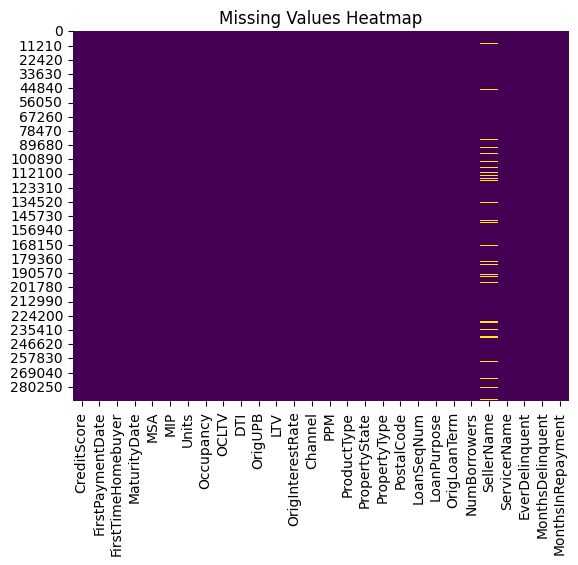

In [32]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [33]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

CreditScore           0.000000
FirstPaymentDate      0.000000
FirstTimeHomebuyer    0.000000
MaturityDate          0.000000
MSA                   0.000000
MIP                   0.000000
Units                 0.000000
Occupancy             0.000000
OCLTV                 0.000000
DTI                   0.000000
OrigUPB               0.000000
LTV                   0.000000
OrigInterestRate      0.000000
Channel               0.000000
PPM                   0.000000
ProductType           0.000000
PropertyState         0.000000
PropertyType          0.000000
PostalCode            0.000000
LoanSeqNum            0.000000
LoanPurpose           0.000000
OrigLoanTerm          0.000000
NumBorrowers          0.000000
SellerName            8.575713
ServicerName          0.000000
EverDelinquent        0.000000
MonthsDelinquent      0.000000
MonthsInRepayment     0.000000
dtype: float64


In [35]:
# Fill missing values with the mode for each categorical column
for col in categorical_columns:
    mode_value = df[col].mode()[0]  # Get the mode (most frequent value)
    df[col].fillna(mode_value, inplace=True)

# Display the DataFrame to verify the changes
df.head()

CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  MIP  \
0            0            199902                  N        202901  16974   25   
1            0            199902                  N        202901  19740    0   
2            0            199902                  N        202901  29940    0   
3            0            199902                  N        202901  31084    0   
4            0            199902                  N        202901  35644    0   

   Units Occupancy  OCLTV  DTI  ...  PostalCode    LoanSeqNum  LoanPurpose  \
0      1         O     89   27  ...       60400  F199Q1268030            P   
1      1         O     73   17  ...       80200  F199Q1015092            N   
2      1         O     75   16  ...       66000  F199Q1266886            N   
3      1         O     76   14  ...       90700  F199Q1178167            N   
4      1         O     78   18  ...        7600  F199Q1178517            N   

  OrigLoanTerm NumBorrowers SellerName          ServicerName EverDelinquent  \
0          360            2         FL  WASHINGTONMUTUALBANK              0   
1          360            1         FT  CHASEHOMEFINANCELLC               0   
2          360            2         FL  WASHINGTONMUTUALBANK              0   
3          360            2         GM  GMACMTGECORP                      0   
4          360            2         GM  GMACMTGECORP                      0   

  MonthsDelinquent MonthsInRepayment  
0                0                52  
1                0               144  
2                0                67  
3                0                35  
4                0                54  

[5 rows x 28 columns]

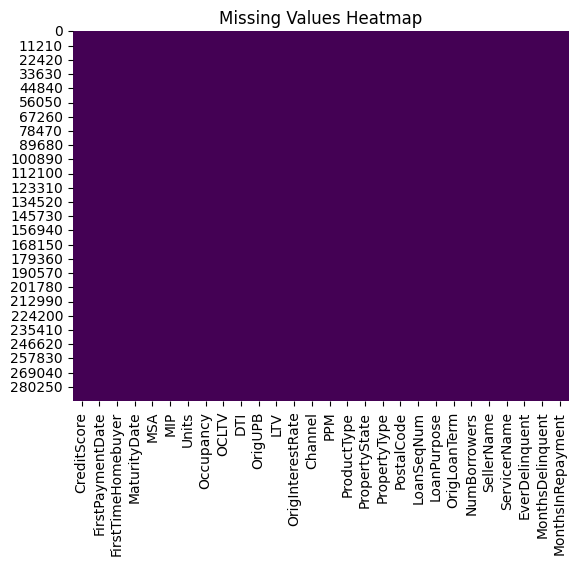

In [36]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

Data Cleaning and Preprocessing

Univariate Analysis

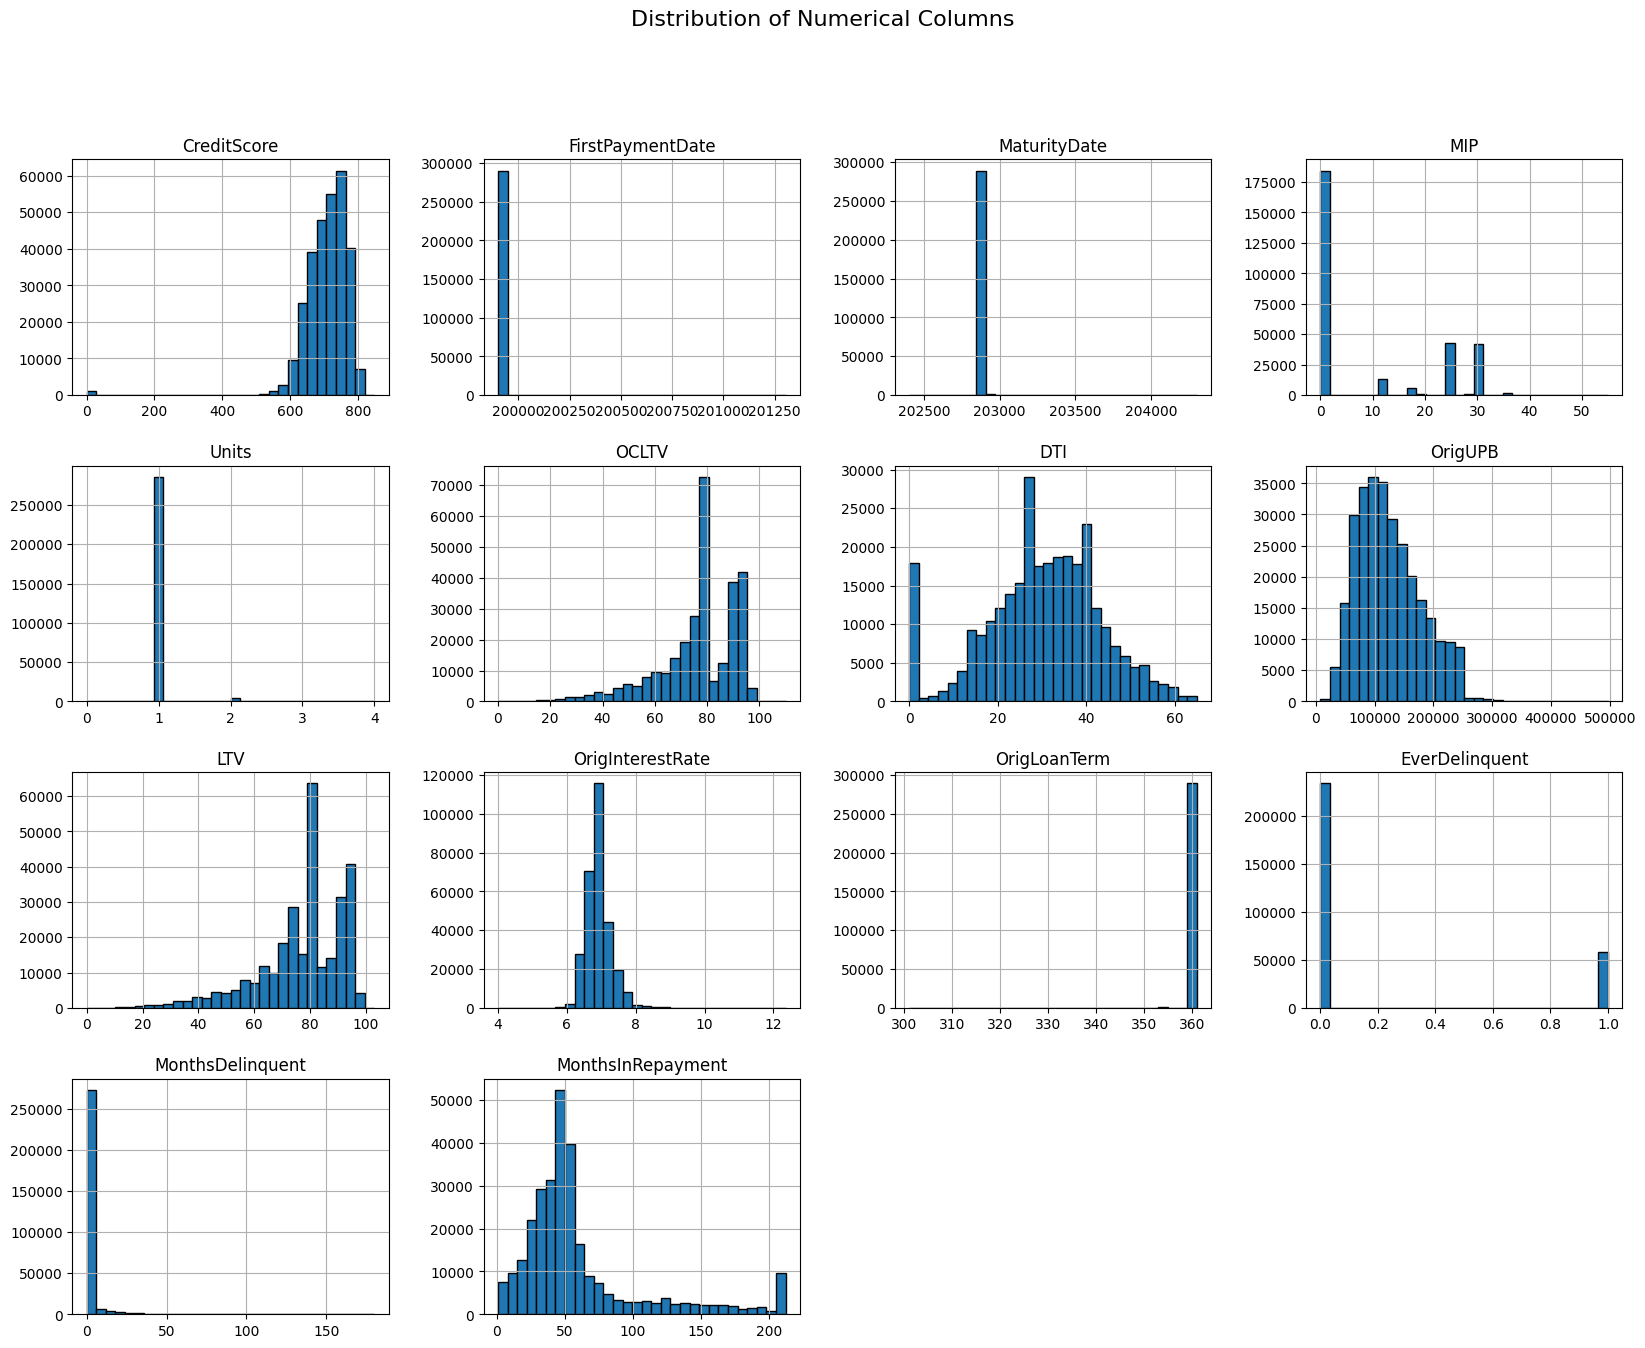

In [37]:
# Histogram for numerical columns
df.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle("Distribution of Numerical Columns", fontsize=16)
plt.show()

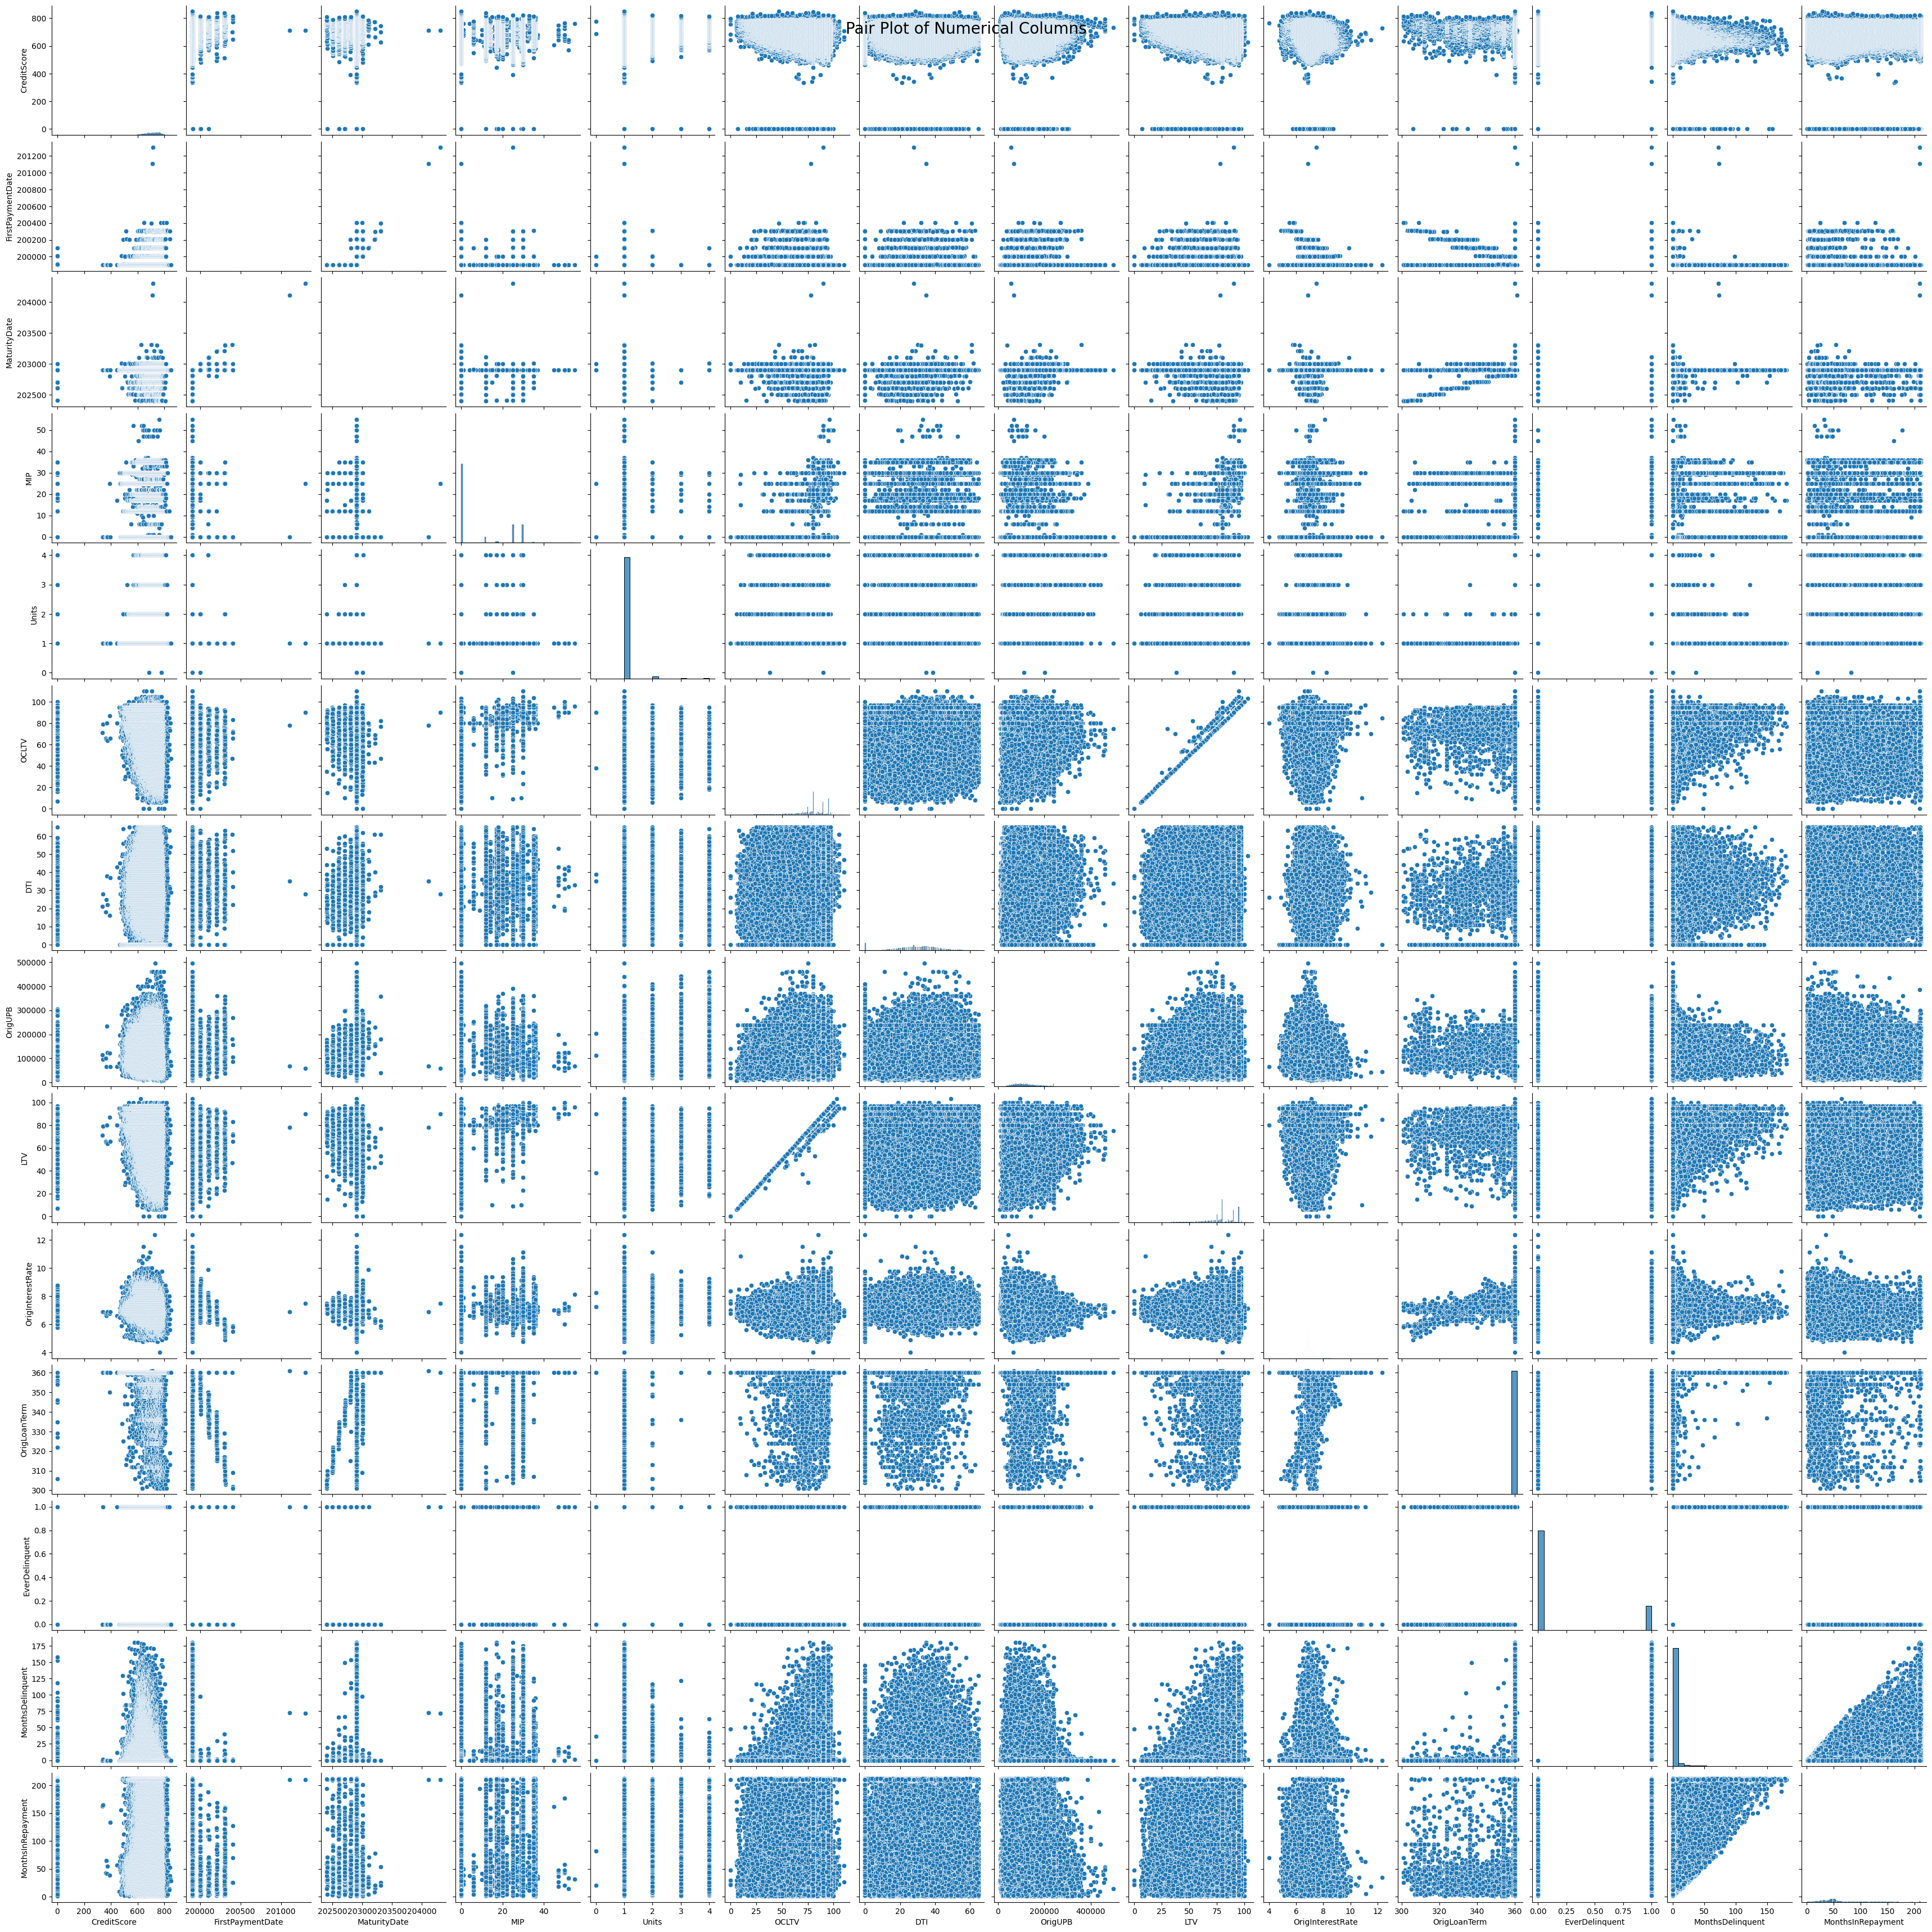

In [38]:
# Numerical vs Numerical
# Scatter plot for numerical columns

sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.suptitle("Pair Plot of Numerical Columns", fontsize=20)
plt.show()

Correlation Matrix

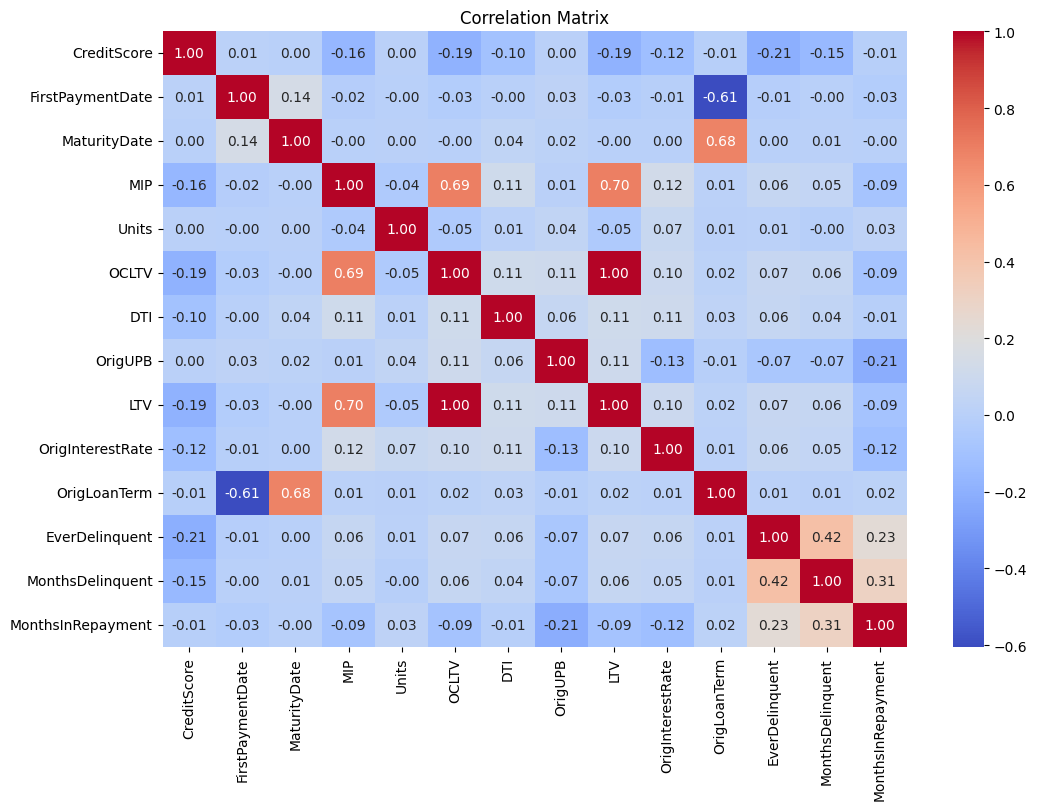

In [39]:
# Correlation matrix
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Check for Outliers

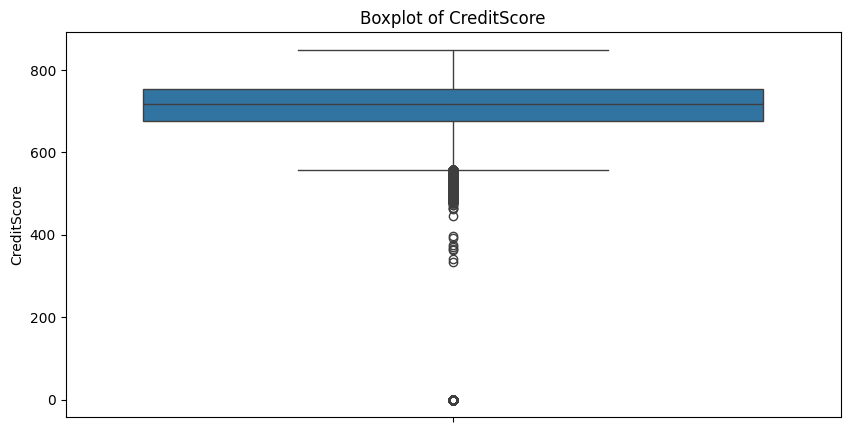

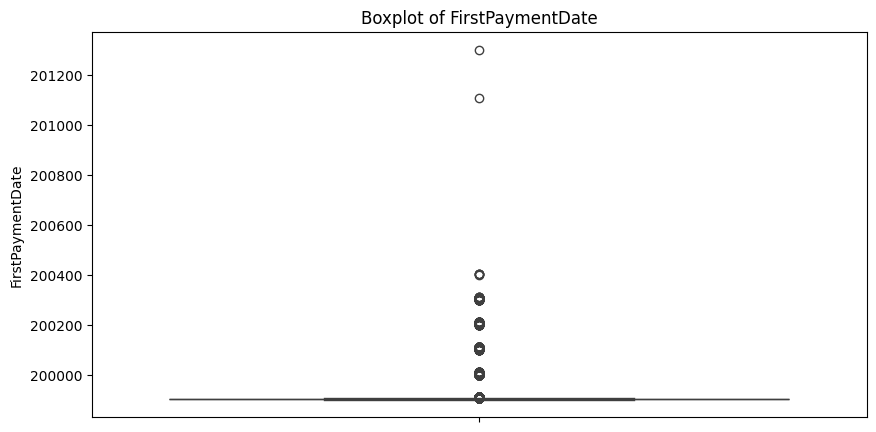

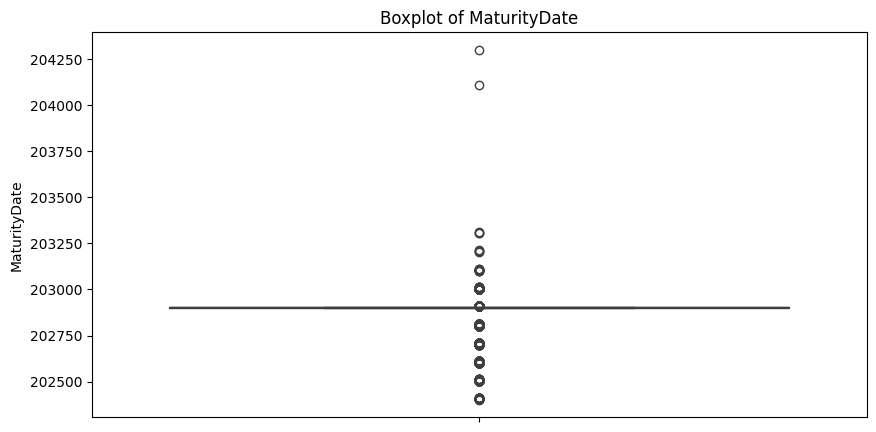

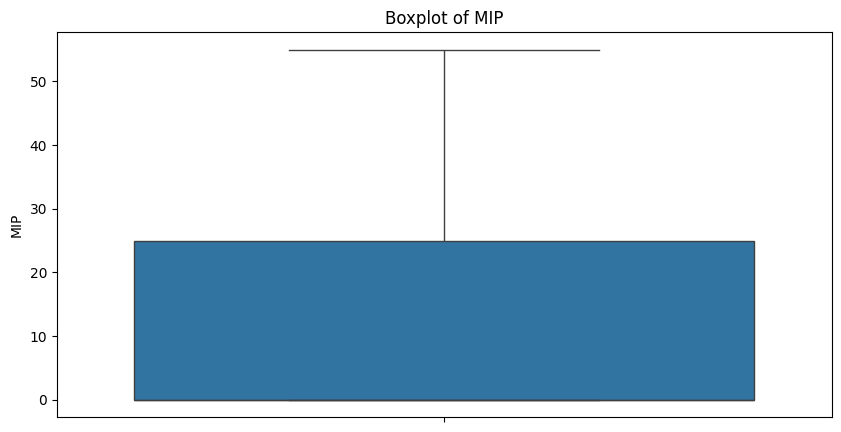

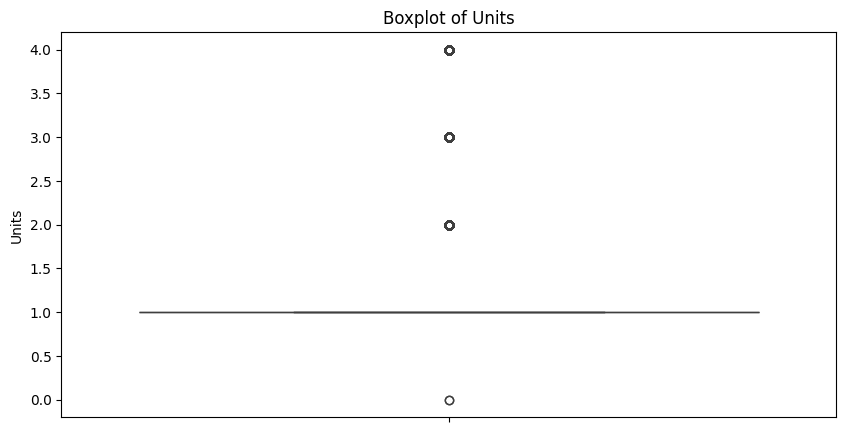

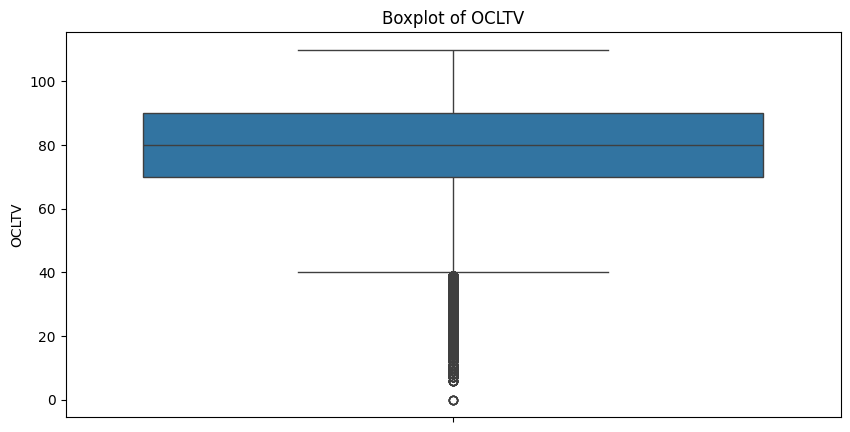

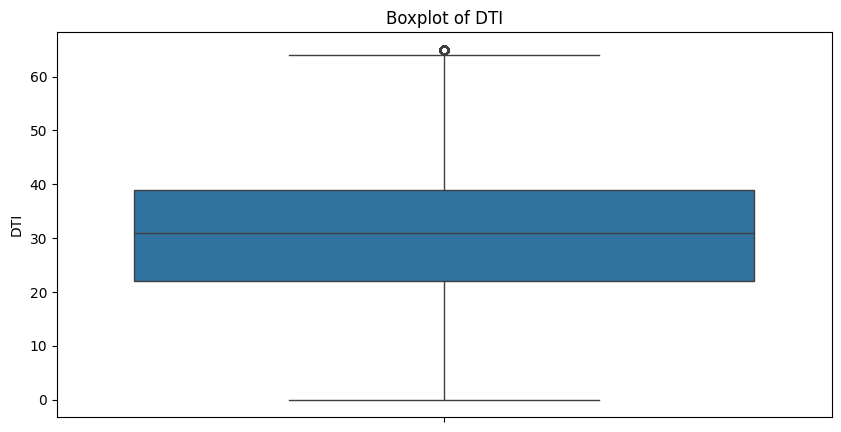

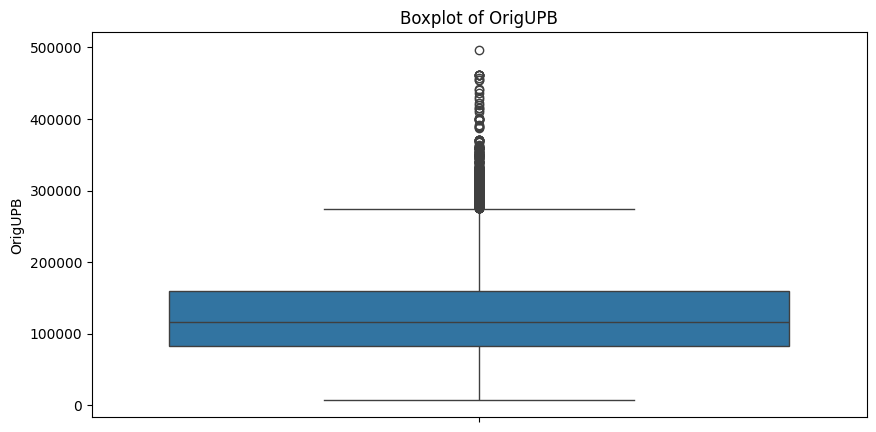

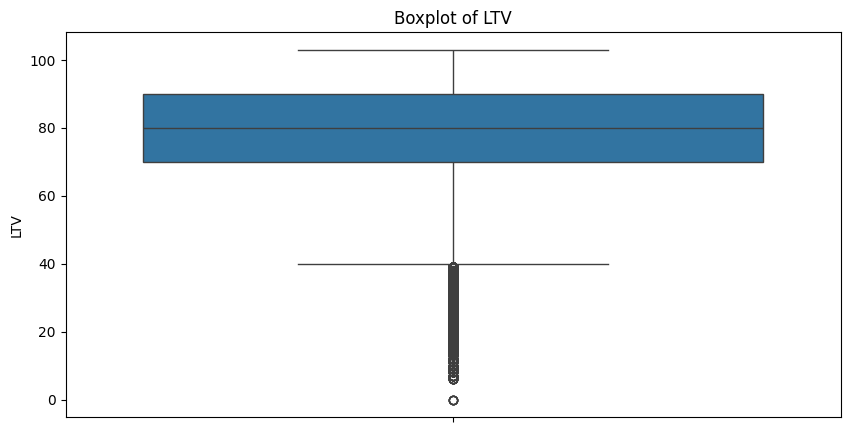

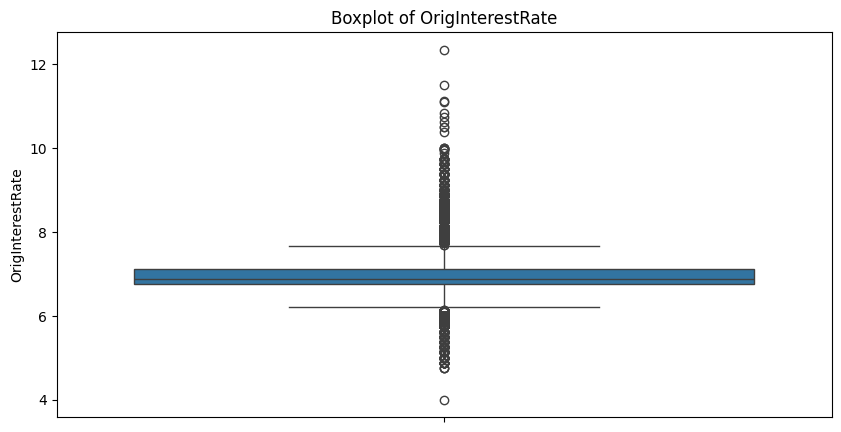

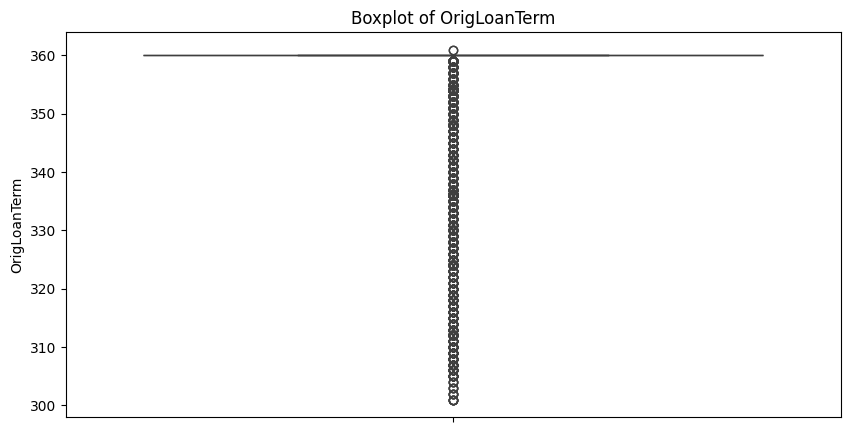

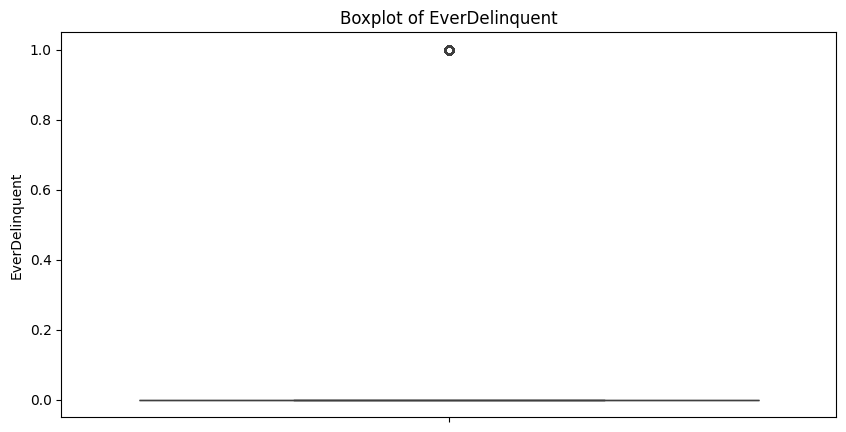

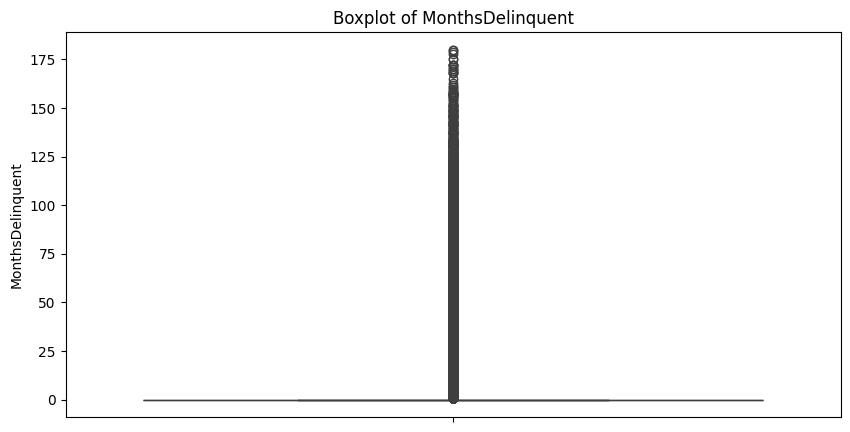

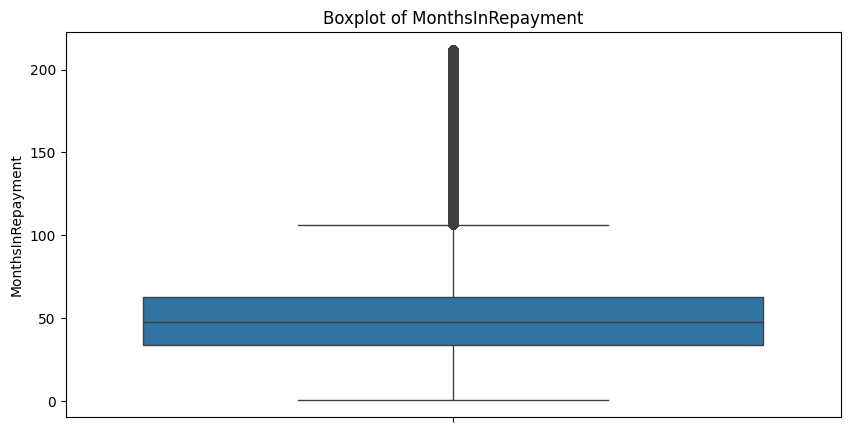

In [40]:
# Boxplots to identify outliers in numerical columns
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Label Encoder

In [42]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Display the first few rows of the transformed dataframe
df.head()

CreditScore  FirstPaymentDate  FirstTimeHomebuyer  MaturityDate  MSA  MIP  \
0            0            199902                   0        202901  357   25   
1            0            199902                   0        202901  387    0   
2            0            199902                   0        202901  110    0   
3            0            199902                   0        202901  125    0   
4            0            199902                   0        202901  169    0   

   Units  Occupancy  OCLTV  DTI  ...  PostalCode  LoanSeqNum  LoanPurpose  \
0      1          1     89   27  ...         470       86314            2   
1      1          1     73   17  ...         688      259731            1   
2      1          1     75   16  ...         531       85110            1   
3      1          1     76   14  ...         787       18846            1   
4      1          1     78   18  ...         637       19227            1   

   OrigLoanTerm  NumBorrowers  SellerName  ServicerName  EverDelinquent  \
0           360             1          17             9               0   
1           360             0          18            13               0   
2           360             1          17             9               0   
3           360             1           2             2               0   
4           360             1           2             2               0   

   MonthsDelinquent  MonthsInRepayment  
0                 0                 52  
1                 0                144  
2                 0                 67  
3                 0                 35  
4                 0                 54  

[5 rows x 28 columns]

Target and Feature Column

In [44]:
target_column = 'MonthsInRepayment'
X = df.drop(target_column, axis=1)
y = df[target_column]

# Fill missing values or drop missing values
X.fillna(X.mean(), inplace=True)


Statsitical Tests:

In [45]:
# Perform Chi-Square Test
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X, y)
chi2_scores = chi2_selector.scores_

# Perform ANOVA test
anova_selector = SelectKBest(f_classif, k='all')
anova_selector.fit(X, y)
anova_scores = anova_selector.scores_

# Print Chi-Square and ANOVA scores
print("Chi-Square Scores:")
print(chi2_scores)
print("\nANOVA Scores:")
print(anova_scores)

# Perform t-test (for binary classification)
if len(y.unique()) == 2:
    t_stat, p_val = ttest_ind(X[y == 0], X[y == 1])
    print("\nT-test Results:")
    print("T-statistic:", t_stat)
    print("P-value:", p_val)

Chi-Square Scores:
[1.36564508e+04 3.20260099e+00 6.34671559e+02 2.92776675e-01
 1.65566256e+04 7.09230427e+04 2.48190551e+01 3.29817326e+01
 1.30390504e+04 2.43854959e+04 3.89676702e+08 1.30933408e+04
 1.79527873e+02 1.81080606e+02 3.32182237e+03            nan
 2.98225904e+03 2.89550441e+02 1.62475971e+05 9.04812470e+07
 7.32606881e+02 2.46266796e+01 6.69415544e+02 8.36245648e+03
 2.47317254e+04 1.54303844e+04 1.43637667e+06]

ANOVA Scores:
[  9.86775668  16.05650905   3.13751892   1.08769997   1.68692645
  19.62611599   2.93316453   2.9590221   20.7805015   20.1853247
  85.01764333  20.89233754  51.77101894   8.85819769  10.24782583
          nan   1.98065104   4.22265971   4.56948897   8.87828028
   7.46528767   8.0711575    8.89986739  15.08274598  40.0673174
  97.53836651 182.37099923]


Save the encode file into csv:

In [46]:
# Save the transformed DataFrame to a new CSV file
encoded_file_path = r"D:\Work Station\mlproject\notebbok\dataset\Encoded_LoanExport.csv"
df.to_csv(encoded_file_path, index=False)